In [1]:
import pandas as pd
import numpy as np
import copy

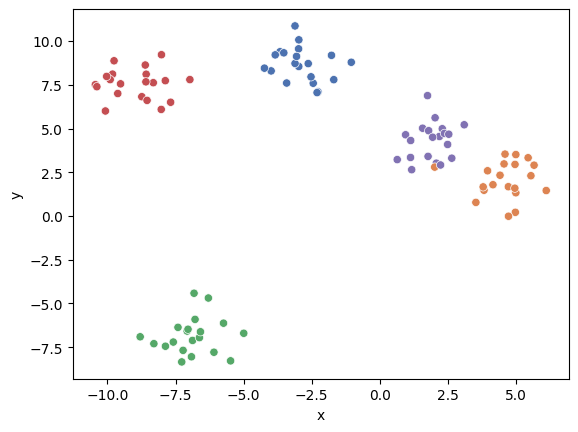

In [4]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
X_train

array([[ -6.2927701 ,  -4.68965397],
       [  2.03530213,   5.61498563],
       [ -2.97261532,   8.54855637],
       [  0.64463087,   3.22362652],
       [ -8.73867639,   6.82004726],
       [ -7.22234171,  -7.68238686],
       [  5.00151486,   1.32804993],
       [  4.1607046 ,   1.78751071],
       [  4.6040528 ,   3.53781334],
       [ -3.10983631,   8.72259238],
       [ -3.6601912 ,   9.38998415],
       [ -6.87451373,  -7.11469673],
       [  1.17550652,   2.64660433],
       [ -2.62484591,   8.71318243],
       [  5.45240466,   3.32940971],
       [ -8.31638619,   7.62050759],
       [  1.57578528,   5.01785035],
       [  0.95140774,   4.64392397],
       [ -7.40938739,  -6.36684216],
       [ -6.97255325,   7.79735584],
       [ -7.87495163,   7.73630384],
       [  6.11777288,   1.45489947],
       [ -2.26723535,   7.10100588],
       [ -5.73680438,  -6.12817656],
       [ -9.81300943,   8.11060752],
       [ -7.67973218,   6.5028406 ],
       [  2.08050895,   3.01848126],
 

In [34]:
class KMeans():
  def __init__(self, k, max_iter):
    self.k = k
    self.max_iter = max_iter

  def fit(self, x_train):
    centroid_indices = np.random.choice(len(x_train), self.k, replace=False)
    centroids = x_train[centroid_indices]

    # create a copy of centroids to check if the centroids changes
    centroids_copy = copy.deepcopy(centroids)
    converged = False

    for i in range(self.max_iter):
      if converged:
        print(f"CONVERGED AFTER {i} RUNS \n")
        break

      clusters = [[] for _ in range(self.k)]

      # find each point's cluster
      for i in range(len(x_train)):
        distances = self.compute_distance(x_train[i], centroids)
        min_dist_idx = np.argmin(distances)
        clusters[min_dist_idx].append(x_train[i])

      # update centroids
      centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] for i, cluster in enumerate(clusters)]

      converged = all(
        np.array_equal(np.array(centroid_c), np.array(centroid))
        for centroid_c, centroid in zip(centroids_copy, centroids)
      )
      centroids_copy = copy.deepcopy(centroids)

    return clusters

  def compute_distance(self, x, centroids):
    return np.sum((centroids - x)**2, axis=1)


In [39]:
kmeans = KMeans(5, 200)
clusters = kmeans.fit(X_train)

for c in clusters:
  print(len(c))

CONVERGED AFTER 5 RUNS 

20
20
8
13
39


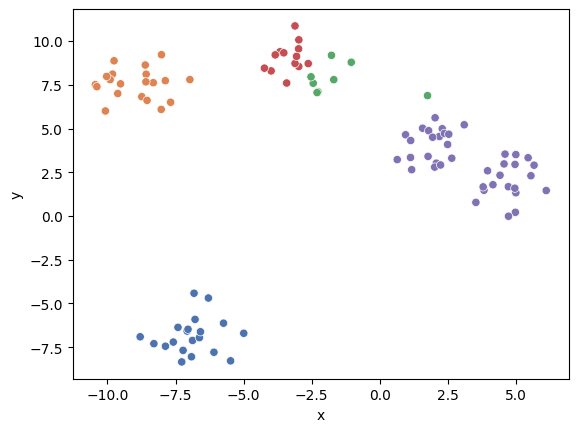

In [40]:
points = []

for i in range(len(clusters)):
  for j in range(len(clusters[i])):
    points.append((clusters[i][j], i))


true_labels = [p[1] for p in points]


sns.scatterplot(x=[p[0][0] for p in points],
                y=[p[0][1] for p in points],
                hue=true_labels,
                palette="deep",
                legend=None
                )

plt.xlabel("x")
plt.ylabel("y")
plt.show()